In [82]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

#### Data Set

In [83]:
mindata = keras.datasets.mnist
data = mindata.load_data()

In [84]:
mindata

<module 'keras.datasets.mnist' from 'C:\\Users\\vasanthan.vasudevan\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages\\keras\\datasets\\mnist\\__init__.py'>

In [85]:
(X_train,Y_train), (X_test, Y_test) = mindata.load_data()

In [86]:
X_train.shape

(60000, 28, 28)

In [87]:
X_test.shape

(10000, 28, 28)

In [88]:
import matplotlib.pyplot as plt

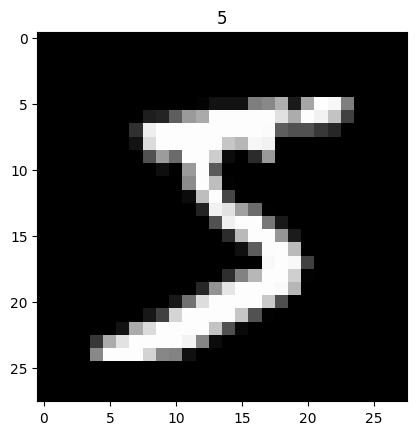

In [89]:
plt.imshow(X_train[0], cmap='gray')
plt.title(Y_train[0])
plt.show()

### Preprocessing data

In [90]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

In [91]:
X_train.shape

(60000, 784)

In [92]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(60000, 784), dtype=uint8)

In [93]:
type(X_train)

numpy.ndarray

In [94]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [95]:
X_train /= 255
X_test /= 255

### Preprocessing of Y value

In [96]:
Y_train = tf.keras.utils.to_categorical(Y_train,10)
Y_test = tf.keras.utils.to_categorical(Y_test,10)

In [97]:
Y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

### Model Design

In [98]:
model1 = Sequential()

In [99]:
model1.add(Dense(10, input_shape=(784,), name='Dense', activation='softmax'))

C:\Users\vasanthan.vasudevan\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [100]:
model1.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])

##  Train the model

In [101]:
model_train = model1.fit(X_train, Y_train, batch_size=65, epochs=50, validation_split=0.2)

Epoch 1/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7485 - loss: 1.0867 - val_accuracy: 0.8555 - val_loss: 0.6562
Epoch 2/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8530 - loss: 0.6096 - val_accuracy: 0.8761 - val_loss: 0.5098
Epoch 3/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8689 - loss: 0.5145 - val_accuracy: 0.8868 - val_loss: 0.4517
Epoch 4/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8778 - loss: 0.4681 - val_accuracy: 0.8907 - val_loss: 0.4197
Epoch 5/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8830 - loss: 0.4395 - val_accuracy: 0.8949 - val_loss: 0.3982
Epoch 6/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8877 - loss: 0.4196 - val_accuracy: 0.8978 - val_loss: 0.3831
Epoch 7/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8904 - loss: 0.4046 - val_accuracy: 0.9012 - val_loss: 0.3713
Epoch 8/50
739/739 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8929 - loss: 0.3929 - val_accuracy: 0.

In [102]:
import matplotlib.pyplot as plt

In [103]:
model_train.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

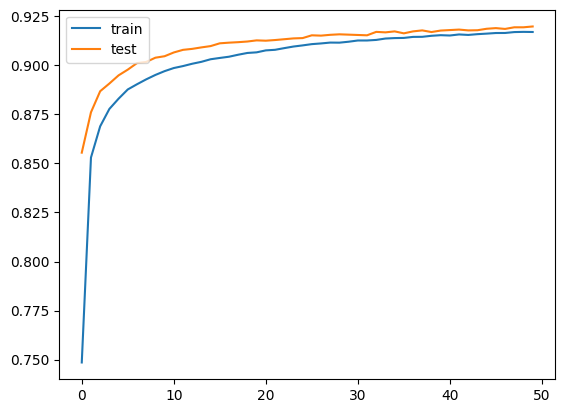

In [104]:
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.legend(['train','test'], loc='upper left')
plt.show()

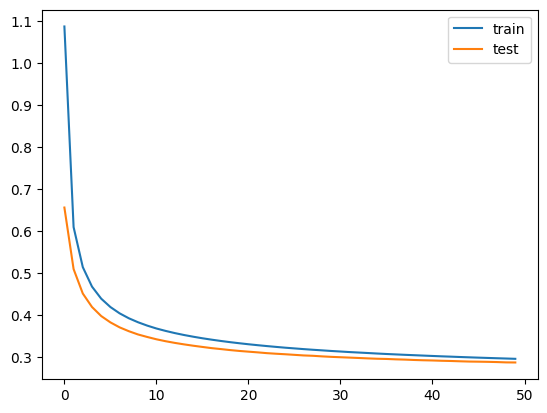

In [105]:
plt.plot(model_train.history['loss'])
plt.plot(model_train.history['val_loss'])
plt.legend(['train','test'],loc='upper right')
plt.show()

## Predict

In [106]:
import random
import numpy as np

In [128]:
random_number = random.randint(0,len(X_test)-1)
random_number

497

In [129]:
random_img = X_test[random_number]
random_lab = Y_test[random_number]

In [130]:
random_lab

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

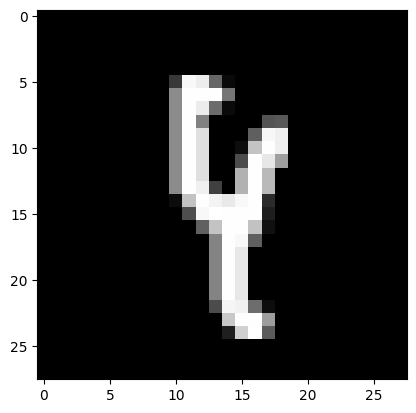

In [131]:
plt.imshow(random_img.reshape(28,28), cmap='grey')

In [132]:
random_img.shape

(784,)

In [133]:
resiz_img = random_img.reshape(1,784)

In [134]:
resiz_img.shape

(1, 784)

In [135]:
pred = model1.predict(resiz_img)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


array([[1.9150698e-06, 1.4614526e-02, 1.6152054e-03, 6.2288740e-03,
        7.6331192e-01, 1.4867914e-02, 8.4941857e-04, 8.8432524e-03,
        1.5803286e-01, 3.1634048e-02]], dtype=float32)

In [136]:
pre_val = np.argmax(pred)

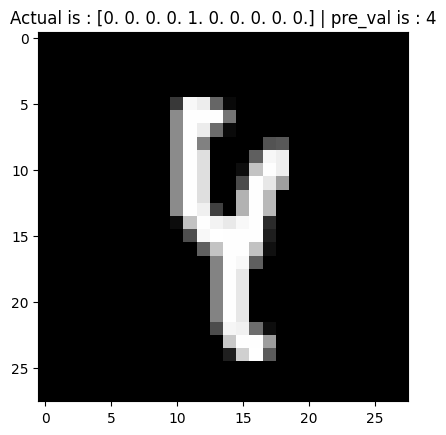

In [137]:
plt.imshow(random_img.reshape(28,28), cmap='grey')
plt.title(f'Actual is : {random_lab} | pre_val is : {pre_val}')
plt.show()